# Baseball Data Analysis

### How does age correlate with performance?
In this project, I'll analyse some historical baseball data to try to determine the correlation between age and performance. 
To start, I'll use the number Batting Runs per Game as a measure of performance.

The tables from the data set that will be used for this analysis are the Master table and the Batting table.

So I'll import all my libraries and read in the tables I need as Pandas DataFrames:


In [1]:
from __future__ import division
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

path = 'baseballdatabank-2017.1/core/'
master = pd.read_csv(path+'Master.csv')
batting = pd.read_csv(path+'Batting.csv')

Great. Now let's take a look at the format of the two tables.

## Master Table

In [2]:
master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


## Batting Table

In [3]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


## Removing Unnecessary Data

Since I only care about the age of the player and their total runs per game, I can zoom into:
- the playerID and birthYear columns from the Master Table
- the playerID, yearID, R (runs) and G (games) columns from the Batting Table


So from the Batting Table, I'll create a Pandas series with their birth years as values and their playerIDs as keys:

In [4]:
births = pd.Series(data=master.loc[:,'birthYear'].values, index=master.loc[:,'playerID'].values)
births.head()

aardsda01    1981.0
aaronha01    1934.0
aaronto01    1939.0
aasedo01     1954.0
abadan01     1972.0
dtype: float64

And from the Master table, I'll create a new dataframe called runs which only has the columns we care about:

In [5]:
runs = batting.loc[:, ['playerID','yearID','R','G']]
runs.head()

,playerID,yearID,R,G
0,abercda01,1871,0,1
1,addybo01,1871,30,25
2,allisar01,1871,28,29
3,allisdo01,1871,28,27
4,ansonca01,1871,29,25


## Adding Columns

So now I want to calculate the Runs per Game for each player in each year and I want to calculate the age of the player in that year. After doing that I'll create two new columns: "R/G" and "age" in the runs table to store that information.

In [6]:
def per(row):
    return row['R']/row['G']

def age(row):
    year = row['yearID']
    birth = births[row['playerID']]
    return year - birth

runs['R/G'] = runs.apply(per,axis=1)
runs['age'] = runs.apply(age,axis=1)

In [7]:
runs.loc[:10,:]

,playerID,yearID,R,G,R/G,age
0,abercda01,1871,0,1,0.000000,21.0
1,addybo01,1871,30,25,1.200000,29.0
2,allisar01,1871,28,29,0.965517,22.0
3,allisdo01,1871,28,27,1.037037,25.0
4,ansonca01,1871,29,25,1.160000,19.0
5,armstbo01,1871,9,12,0.750000,21.0
6,barkeal01,1871,0,1,0.000000,32.0
7,barnero01,1871,66,31,2.129032,21.0
8,barrebi01,1871,1,1,1.000000,NaN
9,barrofr01,1871,13,18,0.722222,27.0


## Cleaning Data

Great, so we now have the table we'll work with, but if you look at the 8th row, you'll see a NaN. This is probably due to missing birthYear data for that player. 

So we'll want to remove all the rows with NaNs so that our data is clean:

In [8]:
runs = runs.dropna()
runs.loc[:10,:]

,playerID,yearID,R,G,R/G,age
0,abercda01,1871,0,1,0.000000,21.0
1,addybo01,1871,30,25,1.200000,29.0
2,allisar01,1871,28,29,0.965517,22.0
3,allisdo01,1871,28,27,1.037037,25.0
4,ansonca01,1871,29,25,1.160000,19.0
5,armstbo01,1871,9,12,0.750000,21.0
6,barkeal01,1871,0,1,0.000000,32.0
7,barnero01,1871,66,31,2.129032,21.0
9,barrofr01,1871,13,18,0.722222,27.0
10,bassjo01,1871,18,22,0.818182,23.0


That's better... Now on to the visualizations.

## Visualization
Now we can start to visualize our data in order to spot trends in the data. 

First, I'll group the data by age.
Then for each age, I'll sum up all the Runs per Game scores over all the years to see the age with the most Runs per Game.

### Sum of Runs/Game for each Age

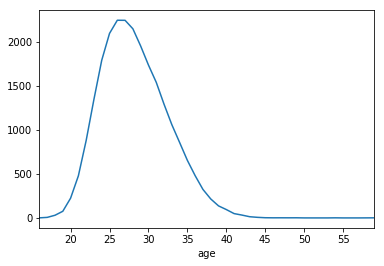

In [9]:
age_rg =runs.groupby('age')['R/G']

age_rg.sum().plot()

#### Wow!
It seems for sure like the most runs per game (total from 1871 to 2016) comes from the players in their mid to late 20's. Can we then assume that the best players tend to be in their mid to late 20s?

I don't think so. I used the sum here. That adds up all the runs per game for people at age 25, for example. 
So according to the plot, the total runs per game of 25 year olds is much higher than the total runs per game of 40 year olds. But that could simply be because there are many many more 25 year old players than there are 40 year old players... not that they're better. 

So let's check this by looking at the number of players at each age over the years.
### Number of Players at each Age

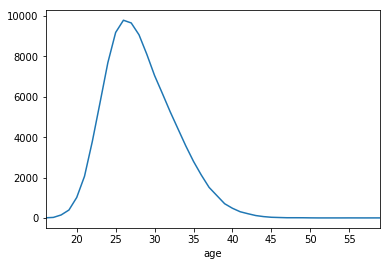

In [10]:
age_rg.count().plot()

Indeed. The majority of players are in their mid to late 20s. That accounts for the huge number of runs/game at that age. 

So clearly the sum isn't a good measure. Let's visualize the mean. 
### Average Runs/Game for each Age 

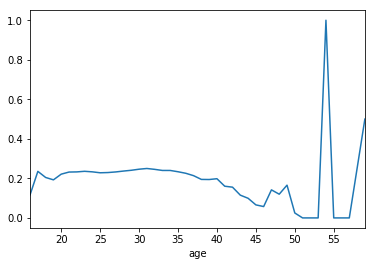

In [11]:
age_rg.mean().plot()

#### Wow!
Very different!

This is more interesting. We see that from about age 20 to about 37, players are, on average, on the same level. Performance starts to dip a bit from age 40. But then theres a spike in late 40s and a **huge** spike at around age 54. And another at around age 59. This seems to be due to outliers. Maybe these are players that were so good that they continued playing until that age. Let's check out these players

### Players over 50

In [12]:
runs[runs['age']>50]

,playerID,yearID,R,G,R/G,age
9643,orourji01,1904,1,1,1.0,54.0
22923,altroni01,1929,0,1,0.0,53.0
23984,altroni01,1931,0,1,0.0,55.0
25020,altroni01,1933,0,1,0.0,57.0
25854,olearch01,1934,1,1,1.0,59.0
44721,paigesa01,1965,0,1,0.0,59.0
54126,minosmi01,1976,0,3,0.0,51.0
57932,minosmi01,1980,0,2,0.0,55.0


Ah! That huge spike at age 54 was a single player in 1904. He made 1 run in 1 game at age 54. That's not very impressive. But since that was the only game played by a 50 year old, it received a R/G score of 1.

Maybe Runs/Game for the entire age over all the years isn't a very good metric. But maybe we can still use it and eliminate these outliers. 

We can have some kind of threshhold for the numbe of games played, to ensure that each player that we are considering has a good enough sample size. But not too high to discriminate against players that don't play that much (although, the reason they don't play that much should be considered). So let's filter our table to only consider, for any given year, players who have played at least 50 games.

Let's first look at the count again, then the mean.

## Players with at least 50 games
### Number of players at each Age

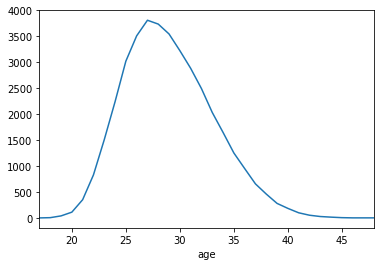

In [13]:
runs_g_over_50 = runs[runs['G']>=50]
runs_g_over_50.groupby('age')['R/G'].count().plot()


### Average Runs/Game for each Age

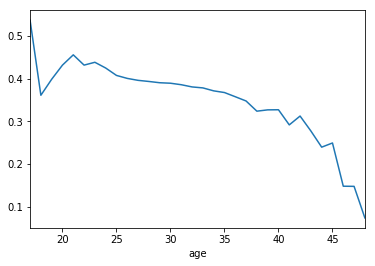

In [14]:
runs_g_over_50.groupby('age')['R/G'].mean().plot()

So now we see, without the outliers, a general trend of a decreasing Runs/Game score as age increases. 

We can also check out a few individual players to see how their performance progressed as they got older.
I chose 2 players from the table of players who were still playing above age 50. Then I randomly chose some other players:

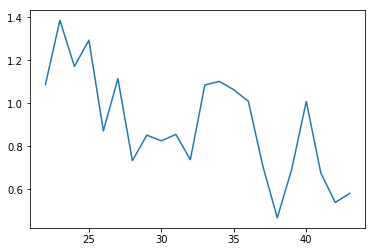

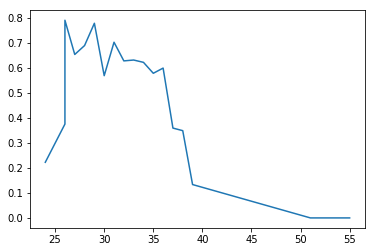

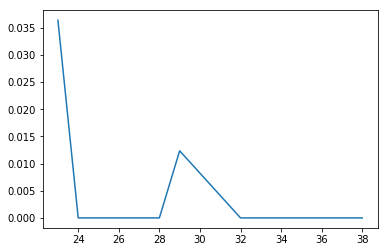

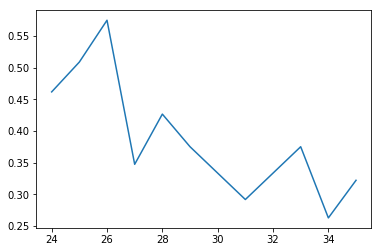

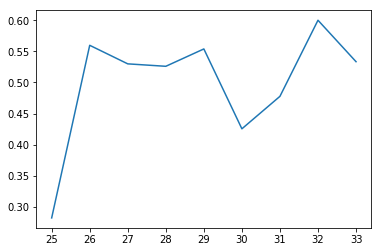

In [19]:
def plot_player(name,games=0):   
    _, _ = plt.subplots()
    table = runs[runs['G']>games]
    p = table[table['playerID']==name]
    r = p.loc[:,['R/G']].values
    a = p.loc[:,['age']].values
    plt.plot(a,r)

plot_player('orourji01',1)
plot_player('minosmi01',1)
for i in range(3):
    name = np.random.choice(runs_g_over_50.loc[:,'playerID'].values)
    plot_player(name,50)



## Final Thoughts
Age seems to have a lot to do with it. 

I'm not sure if a younger age necessarily means better performance. There is a correlation though. We tend to see that younge baseballers tend to outperform older ones on average. This could be because younger players tend to be better players for some reason. Or it could be because there are far less baseballers over forty than there are in their twenties. 

It is clear that the majority of baseballers are in their mid to late 20s. This implies that most baseballers retire after that age. Now why do they retire? That's a good question. It could be injury related, it could be performance related, it could be salary related, etc. These could be explored further with other tables in the data set. 